<a href="https://colab.research.google.com/github/RayBMGDias/TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [204]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

## **Dicionário de dados**

- `customerID:` número de identificação único de cada cliente
- `Churn:` se o cliente deixou ou não é a empresa
- `gender`: gênero (masculino e feminino)
- `SeniorCitizen:` informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- `Partner: `se o cliente possui ou não é parceiro ou parceira
- `Dependents:` se o cliente possui ou não depende
- `tenure:` Código in-line meses de contrato do cliente
- `PhoneService:` assinatura de serviço telefônico
- `MultipleLines`:assisnatura de mais de uma linha de telefone
- `InternetService:` assinatura de um provedor de internet
- `OnlineSecurity:` assinatura adicional de segurança on-line
- `OnlineBackup:` assinatura adicional de backup online
- `DeviceProtection:` assinatura adicional de proteção no dispositivo
- `TechSupport:` assinatura adicional de suporte técnico, menos tempo de espera
- `StreamingTV: `assinatura de TV a cabo
- `StreamingMovies:` assinatura de streaming de filmes
- `Contract:` tipo de contrato
- `PaperlessBilling:` se o cliente preferir receber uma fatura online
- `PaymentMethod:` forma de pagamento
- `Charges.Monthly:` total de todos os serviços do cliente por mês
- `Charges.Total:` gasto total pelo cliente

In [205]:
df_normalizado = json_normalize(data)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [206]:
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [207]:
# Total de valores ausentes por coluna
print(df.isnull().sum())

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


#🔧 Transformação

In [208]:
# Remove os prefixos 'customer.', 'phone.', 'internet.', 'account.' de todos os nomes de colunas
df_normalizado.columns = df_normalizado.columns.str.replace(r'^(customer|phone|internet|account)\.', '', regex=True)

In [209]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [210]:
df_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [211]:
df_normalizado = df_normalizado.drop_duplicates()

In [212]:
pd.unique(df_normalizado['customerID'])

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [213]:
import numpy as np

In [214]:
df_normalizado['Contract'] = df_normalizado['Contract'].str.replace('-', ' ', regex=True)

In [215]:
df_normalizado['PaymentMethod'] = df_normalizado['PaymentMethod'].str.replace('[()]', '', regex=True)

In [216]:
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].replace(r'^\s*$', '0', regex=True)

In [217]:
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].astype(np.float64)

In [218]:
numericos = ['tenure', 'SeniorCitizen']
df_normalizado[numericos] = df_normalizado[numericos].astype(np.int64)

In [219]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40


In [220]:
df_normalizado['Contas.Diarias'] = df_normalizado['Charges.Monthly']/30
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas.Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga e análise

In [221]:
df_normalizado.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas.Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [222]:
import matplotlib.pyplot as plt

In [223]:
df_evasao =df_normalizado.groupby('Churn')[['customerID']].count()
Total_Clientes = df_evasao['customerID'].sum()
df_evasao['Porcentagem'] = round((df_evasao['customerID']/Total_Clientes)*100)
df_evasao = df_evasao.query('Churn == "Yes" | Churn == "No"')

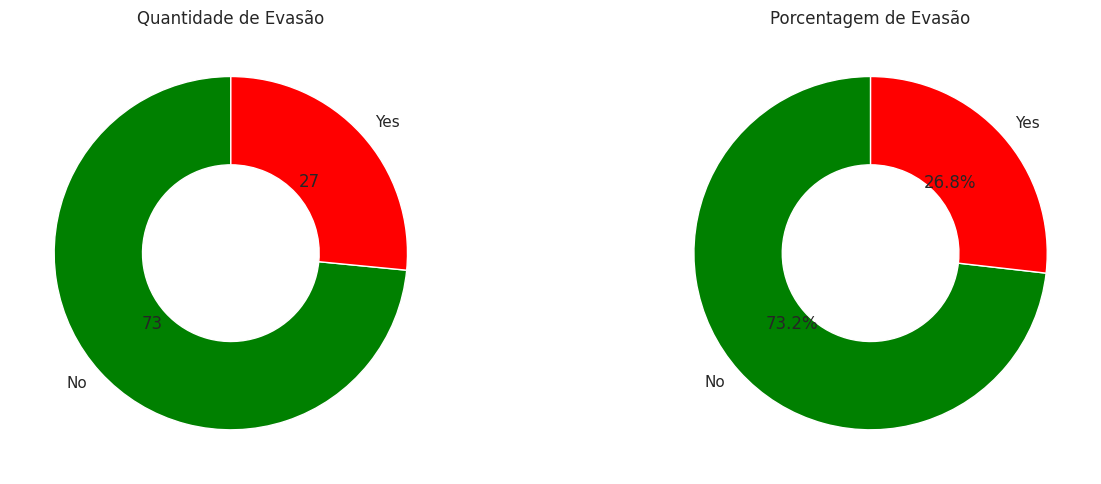

In [224]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.subplots_adjust(wspace=0.4)

cores = ['green', 'red']

axs[0].pie(
    df_evasao['customerID'],
    labels=df_evasao.index,
    autopct='%1.0f',
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.5}
)
axs[0].set_title('Quantidade de Evasão')

axs[1].pie(
    df_evasao['Porcentagem'],
    labels=df_evasao.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.5}
)
axs[1].set_title('Porcentagem de Evasão')

plt.tight_layout()
plt.show()

In [225]:
df_Evasao_Genero =df_normalizado.groupby(['Churn','gender'])[['customerID']].count()
df_Evasao_Genero = df_Evasao_Genero.reset_index()
df_Evasao_Genero = df_Evasao_Genero.query('Churn == "Yes" | Churn == "No"')
soma_genero = df_Evasao_Genero.groupby('gender')[['customerID']].sum()
soma_genero

,customerID
gender,
Female,3488
Male,3555


In [226]:
import seaborn as sns

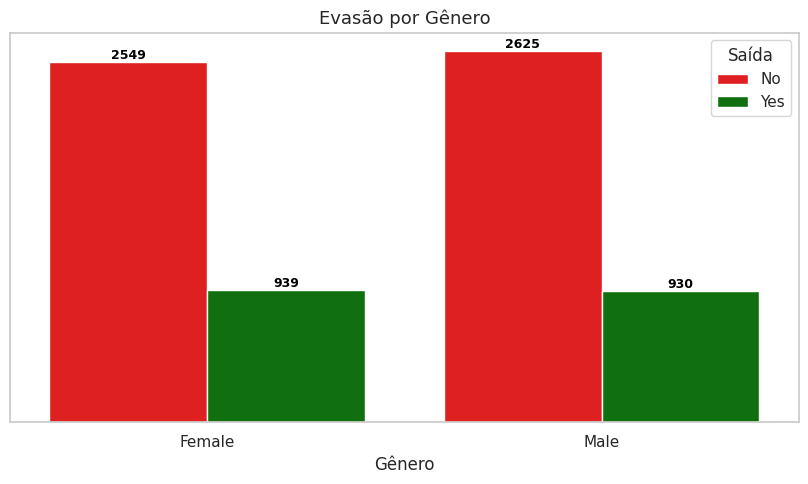

In [227]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")

ax = sns.barplot(data=df_Evasao_Genero, x='gender', y='customerID', hue='Churn', palette = {'Yes': 'green', 'No': 'red'})

plt.title('Evasão por Gênero', fontsize=13)
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Saída')
plt.tight_layout()

for barra in ax.patches:
    altura = barra.get_height()
    if altura > 0:
        ax.text(
            barra.get_x() + barra.get_width()/2,
            altura + 0.5,
            f'{int(altura)}',
            ha='center', va='bottom',
            fontsize=9,
            color='black',
            fontweight='bold'
        )
ax.get_yaxis().set_visible(False)
plt.grid(visible=False)

plt.show()

In [228]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas.Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


In [229]:
df_Evasao_Categorias =df_normalizado.groupby(['Churn','Contract', 'PaymentMethod'])[['customerID']].count()
df_Evasao_Categorias = df_Evasao_Categorias.query('Churn == "Yes" | Churn == "No"')
df_Evasao_Categorias = df_Evasao_Categorias.reset_index()
df_Evasao_Categorias.head()

,Churn,Contract,PaymentMethod,customerID
0,No,Month to month,Bank transfer automatic,388
1,No,Month to month,Credit card automatic,365
2,No,Month to month,Electronic check,856
3,No,Month to month,Mailed check,611
4,No,One year,Bank transfer automatic,353


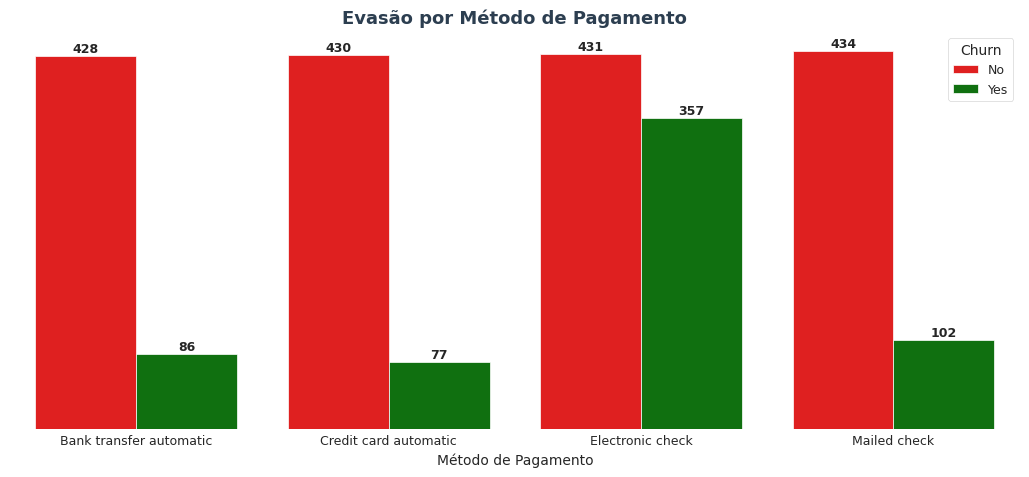

In [230]:
plt.figure(figsize=(11,5))
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

# Paleta personalizada
palette = {'Yes': 'green', 'No': 'red'}

ax = sns.barplot(
    data = df_Evasao_Categorias,
    x='PaymentMethod',
    y='customerID',
    hue='Churn',
    errorbar=None,
    palette=palette
)

# Título e rótulos
plt.title('Evasão por Método de Pagamento', fontsize=13, fontweight='bold', color='#2c3e50')
plt.xlabel('Método de Pagamento', fontsize=10)
plt.ylabel('Número de Clientes', fontsize=10)

# Tamanho dos rótulos do eixo
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)

# Legenda
plt.legend(title='Churn', title_fontsize=10, fontsize=9)

# Layout e bordas
plt.tight_layout()
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Adicionar rótulo nas barras
for barra in ax.patches:
    altura = barra.get_height()
    if altura > 0:
        ax.text(
            barra.get_x() + barra.get_width()/2,
            altura + 1,
            f'{int(altura)}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

# Oculta eixo y e grade
ax.get_yaxis().set_visible(False)
plt.grid(False)

plt.show()

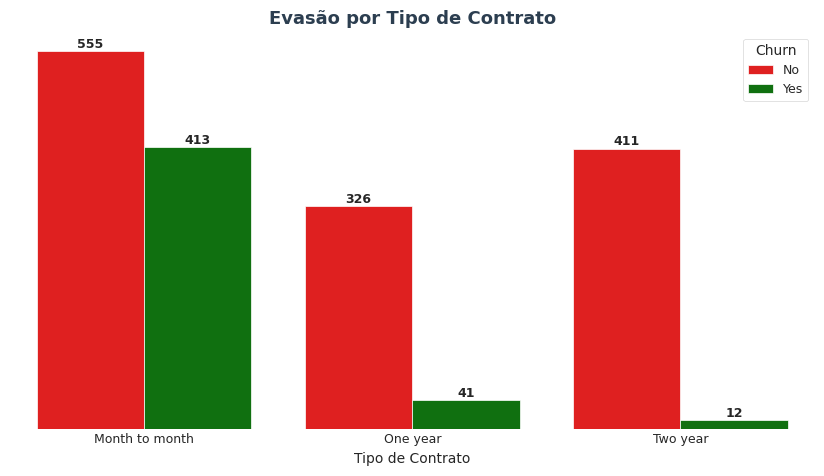

In [231]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")

# Paleta personalizada
palette = {'Yes': 'green', 'No': 'red'}

ax = sns.barplot(
    data=df_Evasao_Categorias,
    x='Contract',
    y='customerID',
    hue='Churn',
    errorbar=None,
    palette=palette
)

# Títulos e rótulos
plt.title('Evasão por Tipo de Contrato', fontsize=13, fontweight='bold', color='#2c3e50')
plt.xlabel('Tipo de Contrato', fontsize=10)
plt.ylabel('Número de Clientes', fontsize=10)

# Legenda e estilo
plt.legend(title='Churn', title_fontsize=10, fontsize=9)
plt.tight_layout()

# Eixos
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)

# Remover bordas
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Adicionar valores nas barras
for barra in ax.patches:
    altura = barra.get_height()
    if altura > 0:
        ax.text(
            barra.get_x() + barra.get_width()/2,
            altura + 1,
            f'{int(altura)}',
            ha='center', va='bottom', fontsize=9, fontweight='bold'
        )

# Ocultar eixo Y e grade
ax.get_yaxis().set_visible(False)
plt.grid(False)

plt.show()

In [232]:
df_Evasao_Idade =df_normalizado.groupby(['Churn','SeniorCitizen'])[['customerID']].count()
df_Evasao_Idade = df_Evasao_Idade.query('Churn == "Yes" | Churn == "No"')
df_Evasao_Idade = df_Evasao_Idade.reset_index()
df_Evasao_Idade['SeniorCitizen'] = df_Evasao_Idade['SeniorCitizen'].apply(lambda x: 'Idoso' if x == 1 else 'Não Idoso')
df_Evasao_Idade

,Churn,SeniorCitizen,customerID
0,No,Não Idoso,4508
1,No,Idoso,666
2,Yes,Não Idoso,1393
3,Yes,Idoso,476


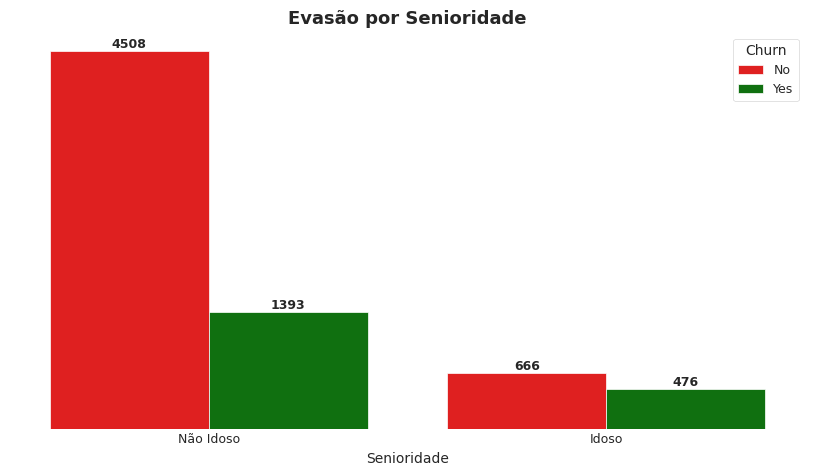

In [233]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")

palette = {'Yes': 'green', 'No': 'red'}

ax = sns.barplot(
    data=df_Evasao_Idade,
    x='SeniorCitizen',
    y='customerID',
    hue='Churn',
    errorbar=None,
    palette=palette
)

plt.title('Evasão por Senioridade', fontsize=13, fontweight='bold')
plt.xlabel('Senioridade', fontsize=10)
plt.ylabel('Número de Clientes', fontsize=10)

plt.legend(title='Churn', title_fontsize=10, fontsize=9)
plt.tight_layout()
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)

for borda in ['top', 'right', 'bottom', 'left']:
    ax.spines[borda].set_visible(False)

for barra in ax.patches:
    altura = barra.get_height()
    if altura > 0:
        ax.text(
            barra.get_x() + barra.get_width() / 2,
            altura + 1,
            f'{int(altura)}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

ax.get_yaxis().set_visible(False)
plt.grid(False)

plt.show()

In [234]:
df_Evasao_Total =df_normalizado.groupby(['Churn','Charges.Total','tenure'])[['customerID']].count()
df_Evasao_Total = df_Evasao_Total.query('Churn == "Yes" | Churn == "No"')
df_Evasao_Total = df_Evasao_Total.reset_index()
df_Evasao_Total

,Churn,Charges.Total,tenure,customerID
0,No,0.00,0,11
1,No,18.80,1,1
2,No,18.85,1,1
3,No,18.90,1,1
4,No,19.00,1,1
...,...,...,...,...
6826,Yes,7856.00,68,1
6827,Yes,7968.85,70,1
6828,Yes,8109.80,72,1
6829,Yes,8127.60,70,1


In [235]:
print(df_Evasao_Total.columns)

Index(['Churn', 'Charges.Total', 'tenure', 'customerID'], dtype='object')


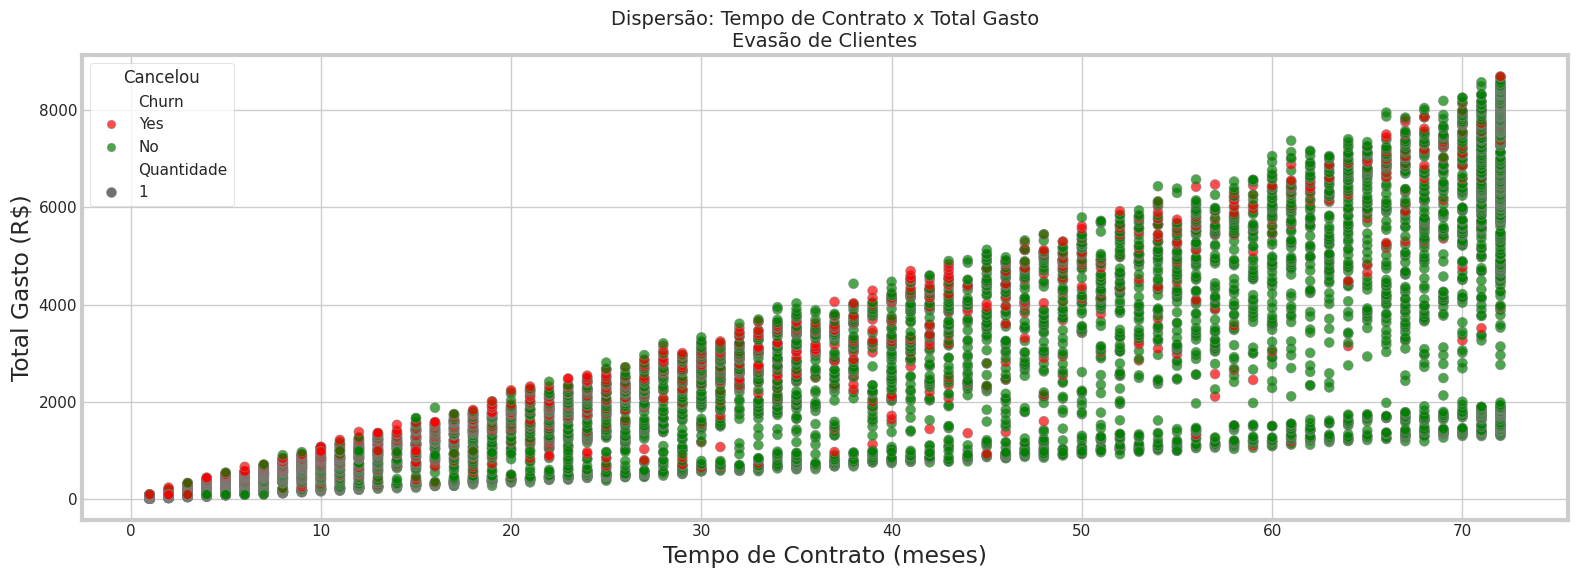

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

# Paleta personalizada: verde para quem não cancelou, vermelho para quem cancelou
palette = {'No': 'green', 'Yes': 'red'}

sns.scatterplot(
    data=df_plot,
    x='tenure',
    y='Charges.Total',
    size='Quantidade',
    hue='Churn',
    sizes=(50, 500),
    alpha=0.7,
    palette=palette,
    edgecolor='gray'
)

plt.title('Dispersão: Tempo de Contrato x Total Gasto\nEvasão de Clientes', fontsize=14)
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Cancelou')
plt.tight_layout()
plt.show()

In [237]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas.Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


In [238]:
df_Evasao_diaria =df_normalizado.groupby(['Churn','Contas.Diarias','Charges.Monthly'])[['customerID']].count()
df_Evasao_diaria = df_Evasao_diaria.query('Churn == "Yes" | Churn == "No"')
df_Evasao_diaria = df_Evasao_diaria.reset_index()
df_Evasao_diaria

,Churn,Contas.Diarias,Charges.Monthly,customerID
0,No,0.608333,18.25,1
1,No,0.613333,18.40,1
2,No,0.618333,18.55,1
3,No,0.623333,18.70,2
4,No,0.625000,18.75,1
...,...,...,...,...
2365,Yes,3.855000,115.65,1
2366,Yes,3.873333,116.20,1
2367,Yes,3.915000,117.45,1
2368,Yes,3.926667,117.80,1


In [239]:
colunas_numericas = df_normalizado.select_dtypes(include=['float64', 'int64']).columns

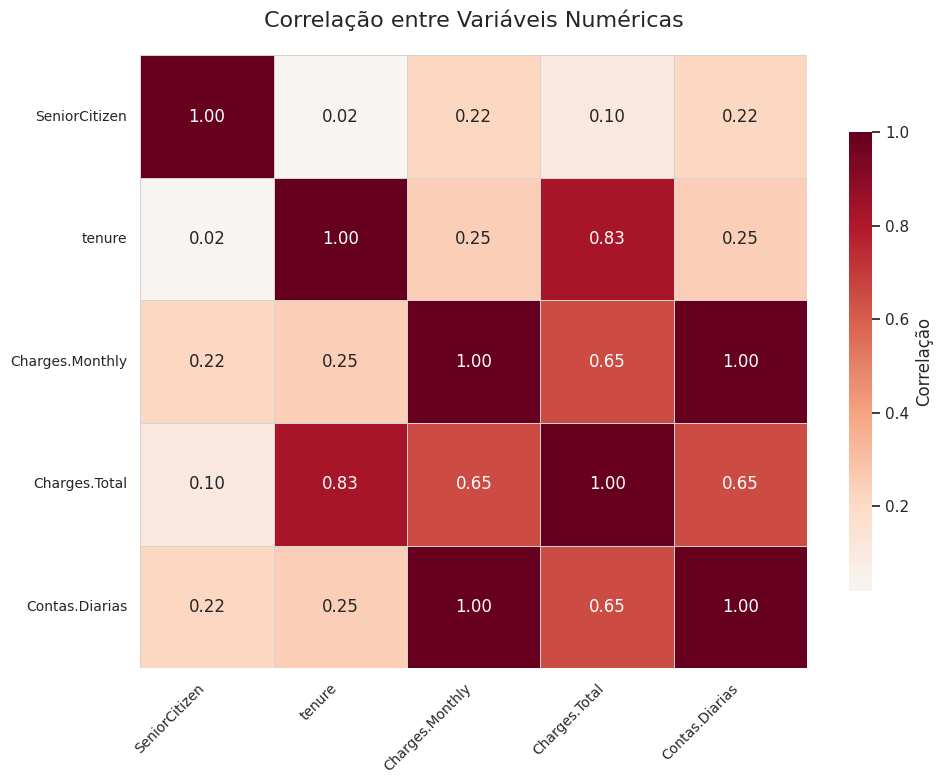

In [240]:
plt.figure(figsize=(10, 8))  # Aumenta o tamanho da figura
sns.set(style='white')        # Estilo limpo

# Criação do heatmap
heatmap = sns.heatmap(
    df_normalizado[colunas_numericas].corr(),
    annot=True,
    fmt='.2f',                      # Mostra os valores com 2 casas decimais
    cmap='RdBu_r',                  # Paleta com contraste mais claro
    center=0,
    linewidths=0.5,                 # Linhas entre os quadrados
    linecolor='lightgray',         # Cor das linhas
    cbar_kws={"shrink": .75, "label": "Correlação"}  # Barra de cor menor com rótulo
)

# Títulos e ajustes
plt.title('Correlação entre Variáveis Numéricas', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Tira as bordas do gráfico
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

#📄Relatorio Final

# Relatório Final: Análise de Evasão de Clientes – TelecomX


---


###Introdução

Este relatório tem como objetivo analisar o comportamento dos clientes da empresa TelecomX, identificar os principais fatores que influenciam a evasão `(Churn)` e propor estratégias eficazes para reduzir a perda de clientes.


A evasão de clientes representa um dos maiores desafios para empresas de telecomunicações. Cada cliente perdido impacta diretamente na receita e gera custos adicionais para aquisição de novos consumidores. A pergunta central desta análise é:

* Quais são os principais fatores que contribuem para a evasão de clientes?

* Etapas de Limpeza e Tratamento de Dados
Durante a preparação dos dados, foram executadas as seguintes ações:

###Importação e Estruturação
- Os dados foram carregados em formato JSON no Google Colab.

- As colunas foram reorganizadas e padronizadas para melhor compreensão.

###Ajuste de Tipos de Dados
- Conversão de variáveis categóricas e numéricas.

- Correção de colunas com tipos incompatíveis.

###Tratamento de Valores Ausentes
- Dados nulos foram identificados e tratados de acordo com a relevância da variável.

- Foram aplicadas remoções ou imputações conforme necessário.

###Normalização de Formatos
- Variáveis foram convertidas conforme a necessidade.

- Limpeza de caracteres indesejados em nomes de colunas.

###Criação de Novas Variáveis
- Exemplo: Gasto Médio Diário = Charges_Monthly / 30.

- Outras variáveis auxiliares foram criadas para enriquecer a análise.

#Análise Exploratória dos Dados (EDA)
`Distribuição do Churn`
- Aproximadamente 27% dos clientes cancelaram seus contratos, sinalizando uma taxa de evasão relevante.

` Perfil de Clientes`
- Contratos mensais apresentam a maior taxa de cancelamento.

- Clientes com menos serviços contratados tendem a evadir com mais frequência.

- A presença de serviços adicionais está associada à maior retenção.

###Análise Financeira
- Clientes com faturas mensais mais altas permanecem mais tempo na base.

**Correlação forte entre:**

- Tempo de contrato (tenure)

- Gasto total (Charges_Total) → Correlação de 0.83, como esperado.

###Perfil dos Clientes que Cancelam
- Baixo tempo de contrato

- Baixo gasto acumulado

- Pagamento por débito automático é comum entre clientes que cancelam

###Visualizações Destacadas
- Gráficos de dispersão mostraram maior evasão entre clientes com curto tempo de contrato e baixo gasto total.

- Matriz de correlação revelou as seguintes relações relevantes:

- tenure ↔ Charges_Total: Correlação de 0.83

##Conclusões e Insights
- Contratos mensais têm maior propensão ao churn.
- Clientes antigos permanecem significativamente mais tempo.
- Tempo de contrato é mais relevante que o valor da fatura mensal.
- Ser idoso (SeniorCitizen) não tem impacto direto no churn.
- Pagamento Eletrônico está associado a uma maior taxa de evasão.

###Recomendações Estratégicas
- Migração para Contratos de Longo Prazo
Incentivar contratos anuais ou bienais com benefícios, bônus ou descontos.

###Programas de Fidelização
- Oferecer vantagens aos novos clientes para aumentar o tempo médio de permanência.

###Monitoramento Inteligente
- Criar alertas para clientes com baixo tempo de contrato e baixo engajamento.

###Simplificação de Planos
- Analisar a complexidade dos pacotes para tornar a oferta mais clara e acessível.

#Resumo Final
A análise revela que o tempo de contrato é o fator mais determinante para a permanência ou evasão dos clientes. Aqueles que contratam planos mensais e possuem baixo gasto acumulado representam o grupo mais vulnerável. Estratégias de retenção devem ser direcionadas especialmente a esse perfil, visando aumentar sua fidelidade e satisfação com os serviços da TelecomX.